# Luke Bradfield - MLA - Assignment - Provided Data

In [4]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Set to 1 to avoid memory leak issue

In [6]:
import sklearn

In [7]:
sklearn.set_config(transform_output="pandas")

In [8]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree

In [11]:
# Importing the csv dataset and displaying
# Used header and usecols to make sure imported correctly and resolve errors
df = pd.read_csv('cwdata.csv', header=0, usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
df

,Income,Area,Employed,Education,Home Owner,Gender,Balance,Age,Colour,Fraud
0,12500.0,Rural,NaN,School,N,F,300,25,Yellow,Y
1,76300.0,U,Y,College,Y,Male,35000,25,Black,No
2,18500.0,Rural,N,School,No,F,1025,25,Grey,1
3,35250.0,Urban,Y,U,Y,F,6750,39,White,No
4,50000.0,Urban,Yes,University,1,Male,8100,35,Black,No
...,...,...,...,...,...,...,...,...,...,...
117,7650.0,R,0,S,0,M,123,23,Red,Yes
118,5450.0,r,N,School,No,F,300,21,Black,1
119,84500.0,Urban,Yes,U,Y,M,24550,32,Grey,No
120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

 # Checking the data

In [15]:
# Checking info on colums annd data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Income      120 non-null    float64
 1   Area        120 non-null    object 
 2   Employed    118 non-null    object 
 3   Education   118 non-null    object 
 4   Home Owner  121 non-null    object 
 5   Gender      120 non-null    object 
 6   Balance     120 non-null    object 
 7   Age         120 non-null    object 
 8   Colour      120 non-null    object 
 9   Fraud       120 non-null    object 
dtypes: float64(1), object(9)
memory usage: 9.7+ KB


In [19]:
# Checking data size, showing 122 rows and 10 columns
print("(row, columns)",df.shape)

(row, columns) (122, 10)


In [21]:
#Cehcking the data types, showing income as float and rest as objects
df.dtypes

Income        float64
Area           object
Employed       object
Education      object
Home Owner     object
Gender         object
Balance        object
Age            object
Colour         object
Fraud          object
dtype: object

In [23]:
#check if any missing values in columns.
df.isnull().any()

Income        True
Area          True
Employed      True
Education     True
Home Owner    True
Gender        True
Balance       True
Age           True
Colour        True
Fraud         True
dtype: bool

# Cleaning the data

In [26]:
# Removing the space from the Home Owner column so can be probly handled in code.
df.rename({"Home Owner":"HomeOwner"},axis =1, inplace=True)

In [28]:
# Checking unique values in each column.
# This is to check for every variant to be cleaned.
print("Colours: \t", df.Colour.unique())
print("Education: \t", df.Education.unique())
print("Area: \t", df.Area.unique())
print("Employed: \t", df.Employed.unique())
print("Home Owner: \t", df.HomeOwner.unique())
print("Gender: \t", df.Gender.unique())
print("Fraud: \t", df.Fraud.unique())

Colours: 	 ['Yellow' 'Black' 'Grey' 'White' 'Red' 'Blue' 'White ' 'Pink' 'Green'
 'Purple' nan]
Education: 	 ['School' 'College' 'U' 'University' 'S' 'S ' 'Uni' 'C ' 'Coll' nan 'Uni '
 'Coll ']
Area: 	 ['Rural' 'U' 'Urban' 'R' 'u' 'r' 'Rurak' nan]
Employed: 	 [nan 'Y' 'N' 'Yes' 'No' '0' '1' 'y']
Home Owner: 	 ['N' 'Y' 'No' '1' 'Yes' '0' 'y' ' ' nan]
Gender: 	 ['F' 'Male' 'Female' 'M' ' ' 'PNS' nan]
Fraud: 	 ['Y' 'No' '1' 'N' 'Yes' '0' 'y' 'yes' nan]


In [30]:
# Removing whitespce
df['Education'] = df['Education'].str.rstrip()
df['Colour'] = df['Colour'].str.rstrip()

In [32]:
# Renaming data for data consistancy
df['Area'] = df['Area'].replace({"U": "Urban", "u":"Urban", "r":"Rural", "R":"Rural", "Rurak": "Rural"})
df['Education'] = df['Education'].replace({"U": "University", "S":"School", "C":"College", "Uni":"University", "Coll":"College" })
df['Gender'] = df['Gender'].replace({"M": "Male", "F":"Female"})
df['Employed'] = df['Employed'].replace({"0":"No", "1":"Yes", "Y":"Yes", "y":"Yes", "yes": "Yes", "N":"No"})
df['HomeOwner'] = df['HomeOwner'].replace({"0":"No", "1":"Yes", "Y":"Yes", "y":"Yes", "yes": "Yes", "N":"No"})
df['Fraud'] = df['Fraud'].replace({"0":"No", "1":"Yes", "Y":"Yes", "y":"Yes", "yes": "Yes", "N":"No"})
df.replace(' ', np.nan, inplace=True)

In [34]:
# Removing further whitespce
df['Age'] = df['Age'].str.rstrip()
df['Balance'] = df['Balance'].str.rstrip()

In [36]:
# Dropping any missing values. Dropping all rows with missing values for now.
# Could potentially fill in missing values based of mean etc.
df = df.dropna()
df

,Income,Area,Employed,Education,HomeOwner,Gender,Balance,Age,Colour,Fraud
1,76300.0,Urban,Yes,College,Yes,Male,35000,25,Black,No
2,18500.0,Rural,No,School,No,Female,1025,25,Grey,Yes
3,35250.0,Urban,Yes,University,Yes,Female,6750,39,White,No
4,50000.0,Urban,Yes,University,Yes,Male,8100,35,Black,No
5,15000.0,Rural,No,School,No,Female,120,25,Yellow,Yes
...,...,...,...,...,...,...,...,...,...,...
115,41230.0,Urban,Yes,University,Yes,Male,54500,37,White,No
116,54560.0,Urban,Yes,University,Yes,Female,3250,32,Yellow,No
117,7650.0,Rural,No,School,No,Male,123,23,Red,Yes
118,5450.0,Rural,No,School,No,Female,300,21,Black,Yes


In [38]:
# Rechecking data. Now clean with consistent values in each column.
print("Colours: \t", df.Colour.unique())
print("Education: \t", df.Education.unique())
print("Area: \t", df.Area.unique())
print("Employed: \t", df.Employed.unique())
print("Home Owner: \t", df.HomeOwner.unique())
print("Gender: \t", df.Gender.unique())
print("Fraud: \t", df.Fraud.unique())
#print("Balance: \t", df.Balance.unique())
#print("Age: \t", df.Age.unique())

Colours: 	 ['Black' 'Grey' 'White' 'Yellow' 'Red' 'Blue' 'Pink' 'Green' 'Purple']
Education: 	 ['College' 'School' 'University']
Area: 	 ['Urban' 'Rural']
Employed: 	 ['Yes' 'No']
Home Owner: 	 ['Yes' 'No']
Gender: 	 ['Male' 'Female' 'PNS']
Fraud: 	 ['No' 'Yes']


In [40]:
df.dtypes

Income       float64
Area          object
Employed      object
Education     object
HomeOwner     object
Gender        object
Balance       object
Age           object
Colour        object
Fraud         object
dtype: object

In [42]:
#Showing stats of values in each column.
df.describe(include='all')

,Income,Area,Employed,Education,HomeOwner,Gender,Balance,Age,Colour,Fraud
count,112.000000,112,112,112,112,112,112,112,112,112
unique,NaN,2,2,3,2,3,92,33,9,2
top,NaN,Urban,Yes,University,Yes,Male,30000,25,Black,No
freq,NaN,57,62,54,63,55,4,15,30,57
mean,33750.267857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,33340.487850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5590.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,20950.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,52375.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visulisation

In [45]:
# Checking for balance in data to make sure no bias.
value = df[['Area', 'Employed', 'Education', 'HomeOwner', 'Gender', 'Colour', 'Fraud']].apply(pd.Series.value_counts)

#df['Fraud'].value_counts()

In [47]:
print(value)

            Area  Employed  Education  HomeOwner  Gender  Colour  Fraud
Black        NaN       NaN        NaN        NaN     NaN    30.0    NaN
Blue         NaN       NaN        NaN        NaN     NaN     7.0    NaN
College      NaN       NaN        8.0        NaN     NaN     NaN    NaN
Female       NaN       NaN        NaN        NaN    51.0     NaN    NaN
Green        NaN       NaN        NaN        NaN     NaN     2.0    NaN
Grey         NaN       NaN        NaN        NaN     NaN    21.0    NaN
Male         NaN       NaN        NaN        NaN    55.0     NaN    NaN
No           NaN      50.0        NaN       49.0     NaN     NaN   57.0
PNS          NaN       NaN        NaN        NaN     6.0     NaN    NaN
Pink         NaN       NaN        NaN        NaN     NaN     3.0    NaN
Purple       NaN       NaN        NaN        NaN     NaN     1.0    NaN
Red          NaN       NaN        NaN        NaN     NaN    16.0    NaN
Rural       55.0       NaN        NaN        NaN     NaN     NaN

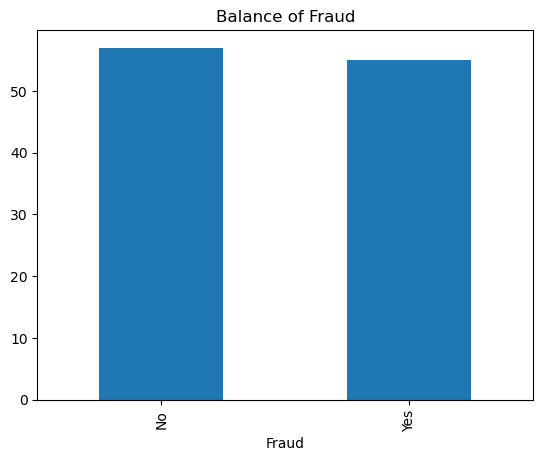

In [49]:
#Checking balnce of fraud. Looks good.
df['Fraud'].value_counts().plot(kind='bar')
plt.title('Balance of Fraud')
plt.show()

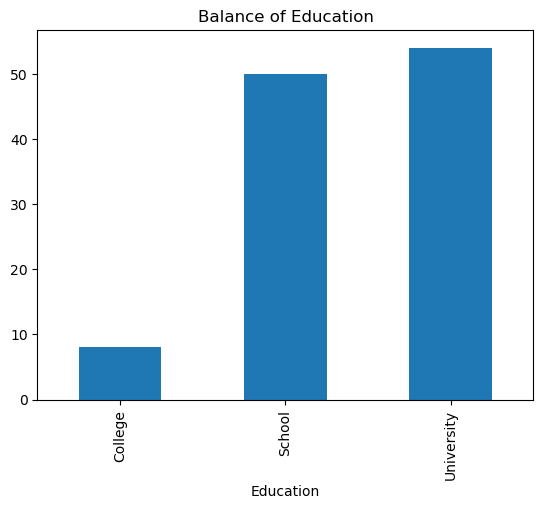

In [51]:
#Checking balance of eduction. Shows imbalance as only a few College entries compared to School and university.
y = df['Education']
y.value_counts().sort_values().plot.bar(x='Target Value', y='Number of Occurrences')
plt.title('Balance of Education')
plt.show()

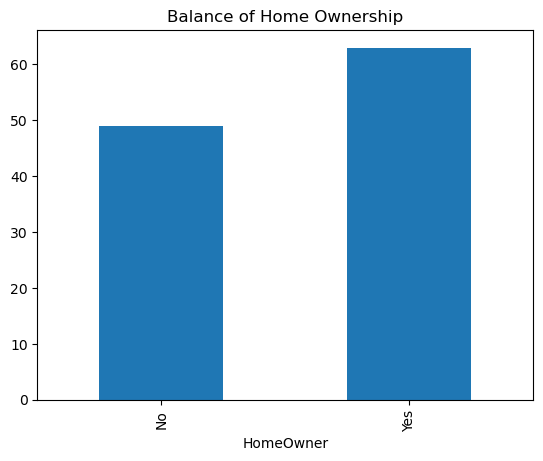

In [53]:
#Checking balnce of Home Ownership. A little but should be ok.
X = df.iloc[:, :-1]
y = df['HomeOwner']
y.value_counts().sort_values().plot.bar(x='Target Value', y='Number of Occurrences')
plt.title('Balance of Home Ownership')
plt.show()

In [55]:
# Converting objects to ints so that data can be checked and handled. Maybe try one at a time.
df['Colour'] = df['Colour'].replace(['Black', 'Grey', 'White', 'Yellow' ,'Red', 'Blue', 'Pink', 'Green', 'Purple'], [0, 1, 2, 3, 4, 5, 6, 7, 8])
df['Education'] = df['Education'].replace(['School', 'College', 'University'], [0, 1, 2])
df['Area'] = df['Area'].replace(['Urban','Rural'], [0, 1])
df['Employed'] = df['Employed'].replace(['Yes', 'No'], [0, 1])
df['HomeOwner'] = df['HomeOwner'].replace(['Yes', 'No'], [0, 1])
df['Gender'] = df['Gender'].replace(['Male', 'Female', 'PNS'], [0, 1, 3])
df['Fraud'] = df['Fraud'].replace(['Yes', 'No'], [0, 1])

C:\Users\Luke\AppData\Local\Temp\ipykernel_13812\3105175827.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Colour'] = df['Colour'].replace(['Black', 'Grey', 'White', 'Yellow' ,'Red', 'Blue', 'Pink', 'Green', 'Purple'], [0, 1, 2, 3, 4, 5, 6, 7, 8])
C:\Users\Luke\AppData\Local\Temp\ipykernel_13812\3105175827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Colour'] = df['Colour'].replace(['Black', 'Grey', 'White', 'Yellow' ,'Red', 'Blue', 'Pink', 'Green', 'Purple'], [0, 1, 2, 3, 4, 5, 6, 7, 8])
C:\Users\L

In [57]:
# Checking that all columns are now either int or flots. Showing Balance and Age columns are still objects.
df.dtypes

Income       float64
Area           int64
Employed       int64
Education      int64
HomeOwner      int64
Gender         int64
Balance       object
Age           object
Colour         int64
Fraud          int64
dtype: object

In [59]:
# Converting objects to ints for plotting. Converting ok.
df['Balance'] = pd.to_numeric(df['Balance'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

C:\Users\Luke\AppData\Local\Temp\ipykernel_13812\4040706557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Balance'] = pd.to_numeric(df['Balance'], errors='coerce')
C:\Users\Luke\AppData\Local\Temp\ipykernel_13812\4040706557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


In [61]:
#Showing stats of values in each column.
df.describe(include='all')

,Income,Area,Employed,Education,HomeOwner,Gender,Balance,Age,Colour,Fraud
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,33750.267857,0.491071,0.446429,1.035714,0.437500,0.616071,12758.723214,31.607143,2.053571,0.508929
std,33340.487850,0.502167,0.499356,0.967290,0.498308,0.750322,27923.513113,10.674848,1.916450,0.502167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000
25%,5590.000000,0.000000,0.000000,0.000000,0.000000,0.000000,345.000000,24.000000,0.000000,0.000000
50%,20950.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2749.500000,27.500000,2.000000,1.000000
75%,52375.000000,1.000000,1.000000,2.000000,1.000000,1.000000,12346.250000,36.250000,4.000000,1.000000
max,156000.000000,1.000000,1.000000,2.000000,1.000000,3.000000,240000.000000,64.000000,8.000000,1.000000


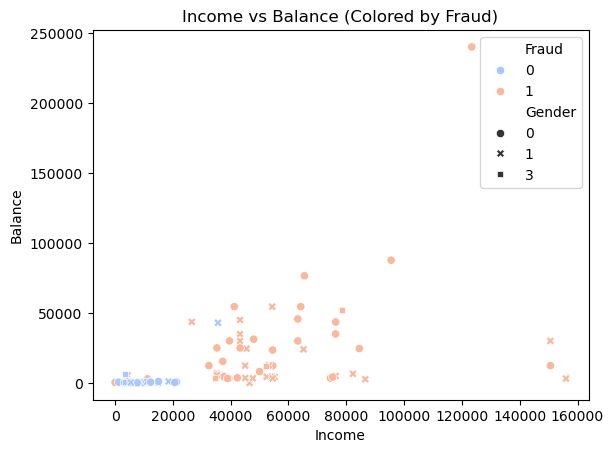

In [63]:
# Starting off plotting balance and income to see if there is any correllation if likely to commit fraud.
#Using Seaborn scatter plotts as easy to show correllation with colours.
# Colourd dotts show lower income and balance less likely to commit fraud. Also gender make no difference.
sns.scatterplot(data=df, x='Income', y='Balance', hue='Fraud', style='Gender', palette='coolwarm')
plt.title('Income vs Balance (Colored by Fraud)')
plt.show()

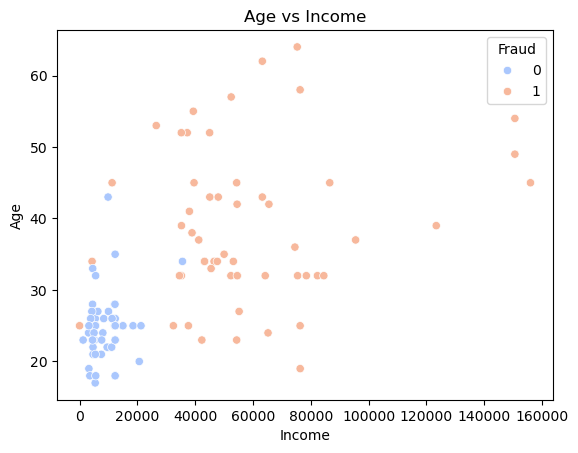

In [65]:
# Next plotting Age and income to see if any correllation likely to commit fraud.
# Shows that younger ages with lower incomes more likely to commit fraud.
sns.scatterplot(data=df, x='Income', y='Age', hue='Fraud', palette='coolwarm')
plt.title('Age vs Income')
plt.show()

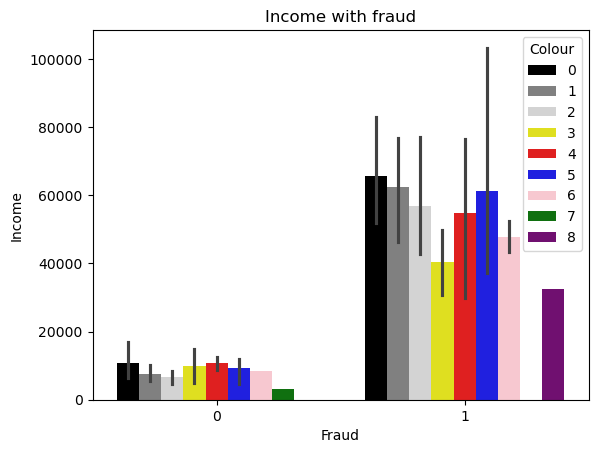

In [67]:
# Plotting bar chart with income and fraud with colour. Trying to see of colour has any correllation.
sns.barplot(data=df, x='Fraud', y='Income', hue='Colour', palette=['Black', 'Grey', 'Lightgrey', 'Yellow', 'Red', 'Blue', 'Pink', 'Green', 'Purple'])
plt.title('Income with fraud')
plt.show()

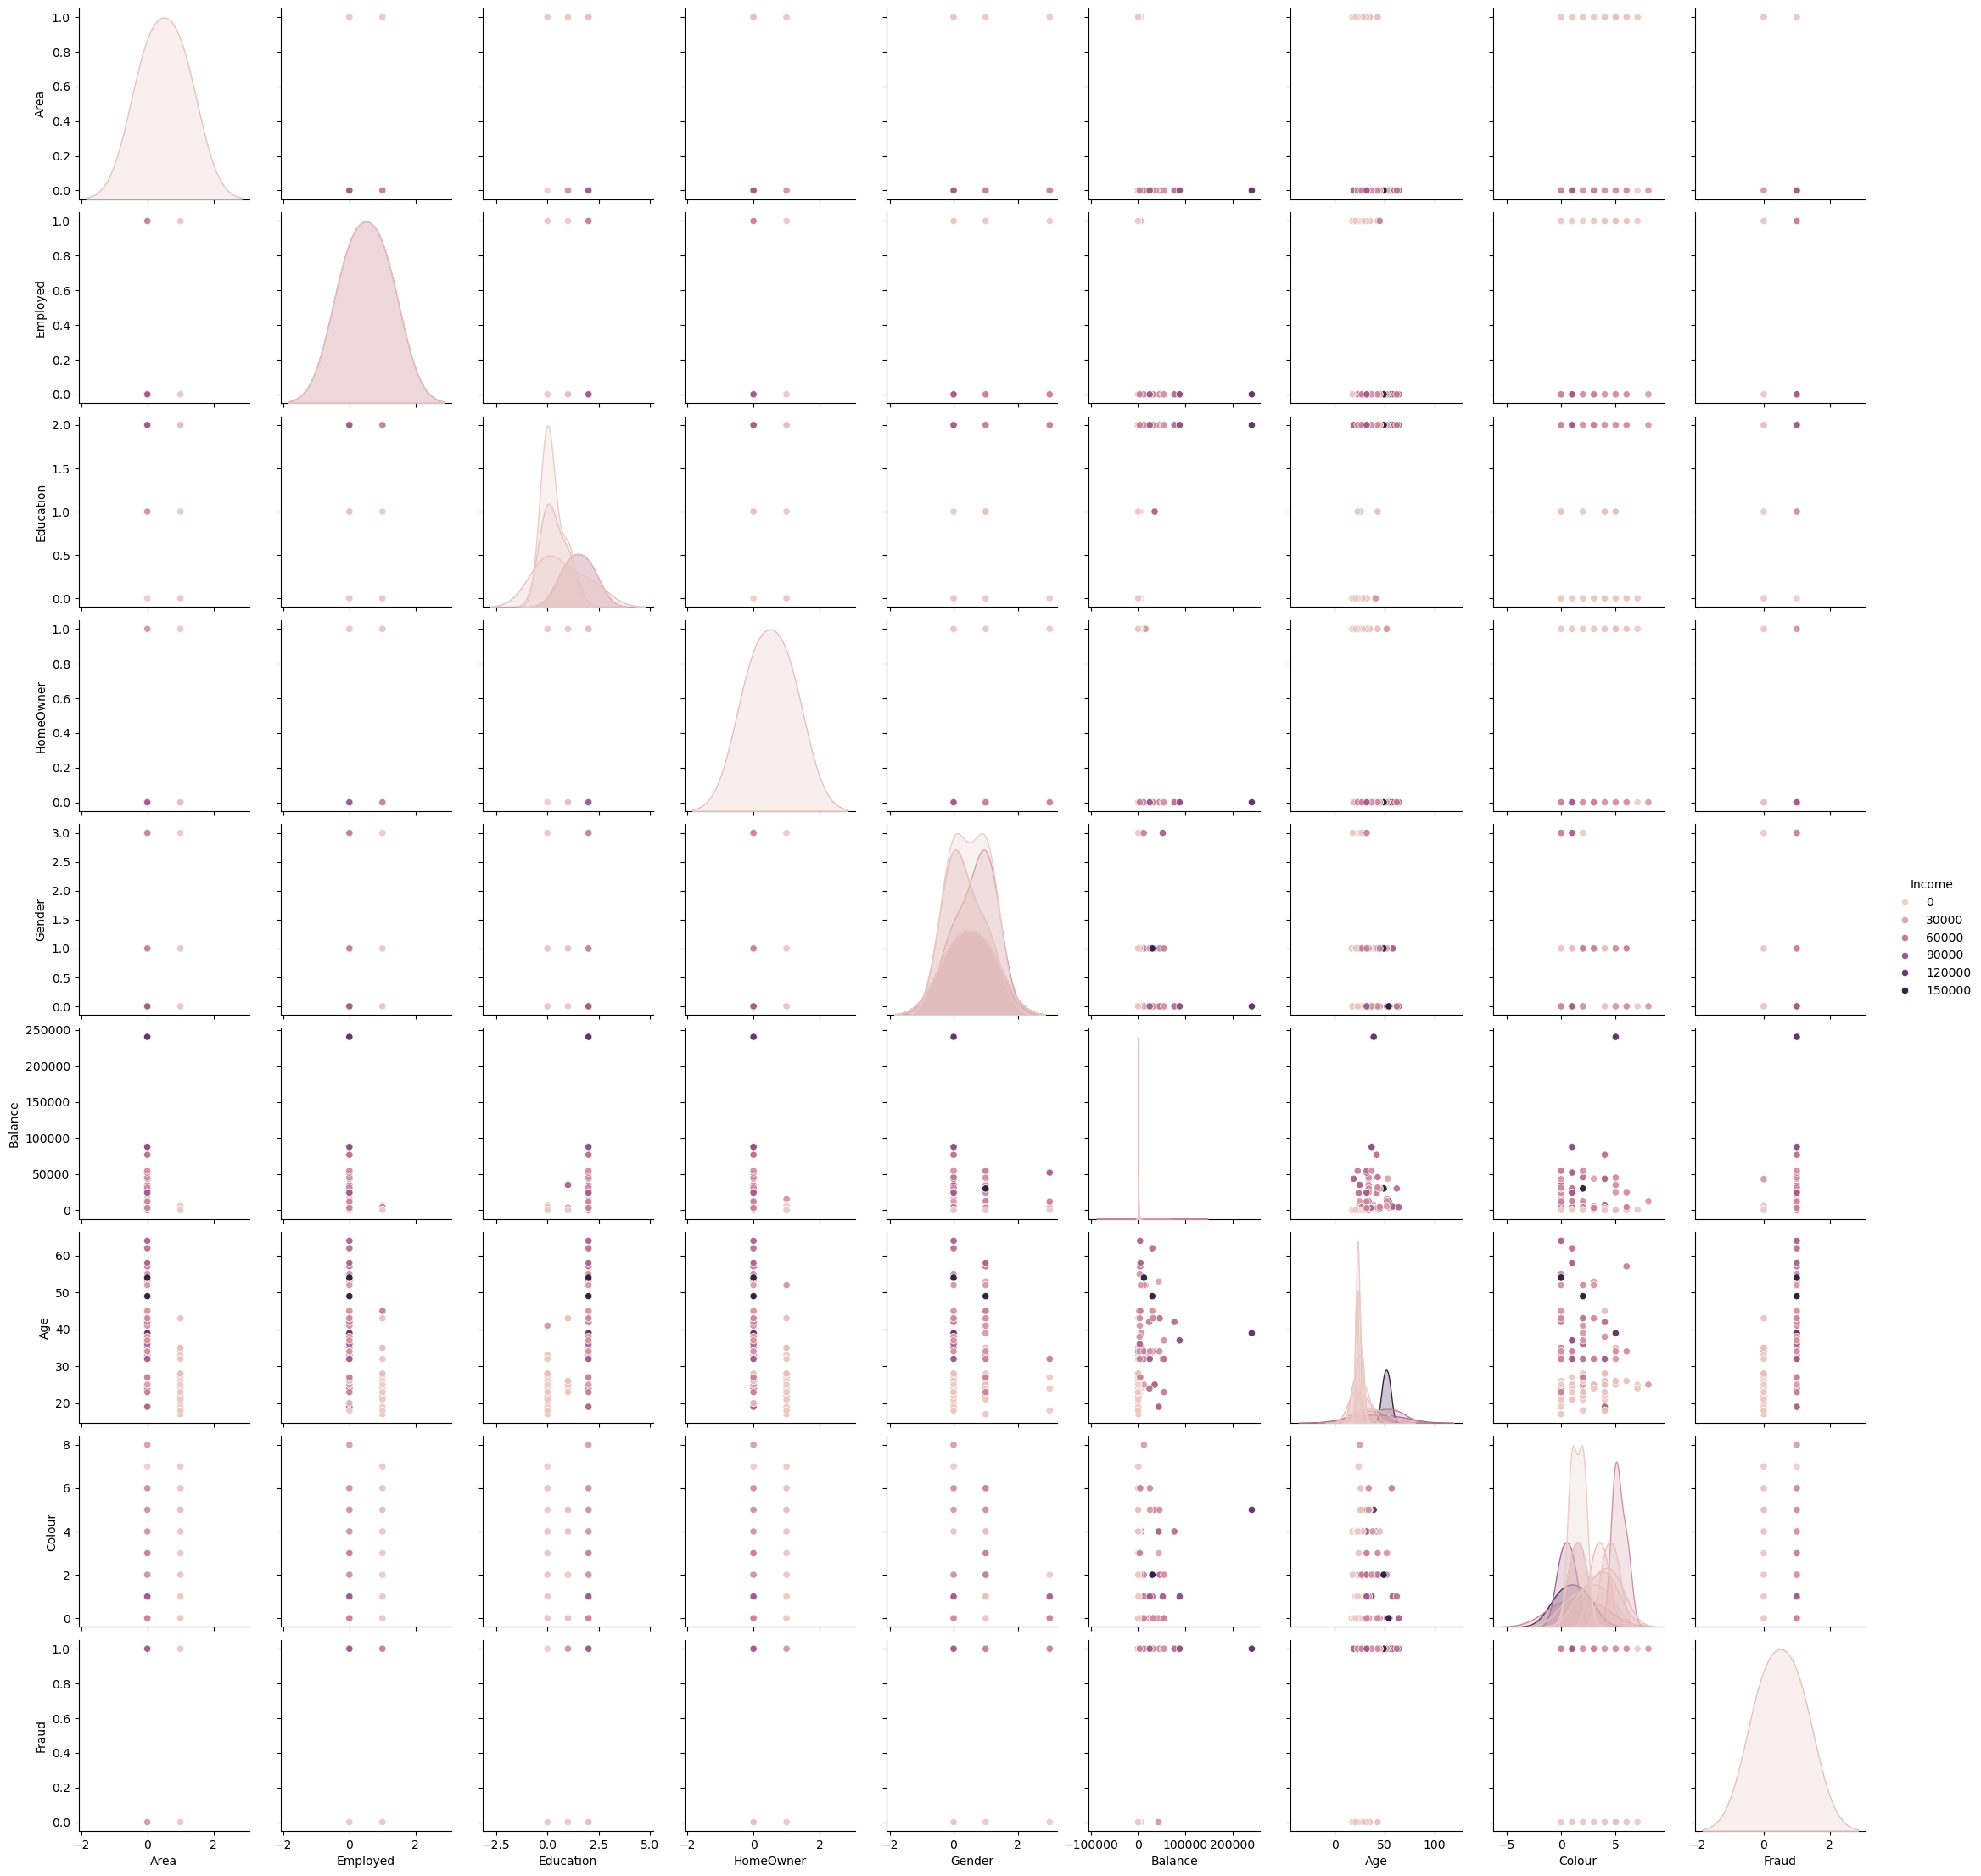

In [69]:
# Plotting pairplot with income as hue.
sns.pairplot(df, hue="Income")
plt.show()

In [71]:
# Checkinbg for Correlation accross all columns.
corr = df.corr()
corr

,Income,Area,Employed,Education,HomeOwner,Gender,Balance,Age,Colour,Fraud
Income,1.000000,-0.756667,-0.674953,0.694742,-0.671847,-0.017466,0.503128,0.577300,-0.158516,0.739839
Area,-0.756667,1.000000,0.842355,-0.871043,0.861806,0.002775,-0.428935,-0.651056,0.047307,-0.964274
Employed,-0.674953,0.842355,1.000000,-0.798011,0.873446,-0.019322,-0.391517,-0.571848,0.115993,-0.842355
Education,0.694742,-0.871043,-0.798011,1.000000,-0.780331,0.019063,0.422683,0.674058,-0.035060,0.871043
HomeOwner,-0.671847,0.861806,0.873446,-0.780331,1.000000,-0.004518,-0.377360,-0.556780,0.041272,-0.861806
Gender,-0.017466,0.002775,-0.019322,0.019063,-0.004518,1.000000,-0.097454,-0.036997,-0.173523,-0.002775
Balance,0.503128,-0.428935,-0.391517,0.422683,-0.377360,-0.097454,1.000000,0.234853,0.083897,0.404777
Age,0.577300,-0.651056,-0.571848,0.674058,-0.556780,-0.036997,0.234853,1.000000,-0.128871,0.651056
Colour,-0.158516,0.047307,0.115993,-0.035060,0.041272,-0.173523,0.083897,-0.128871,1.000000,-0.037946
Fraud,0.739839,-0.964274,-0.842355,0.871043,-0.861806,-0.002775,0.404777,0.651056,-0.037946,1.000000


In [73]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[numeric_cols].corr()

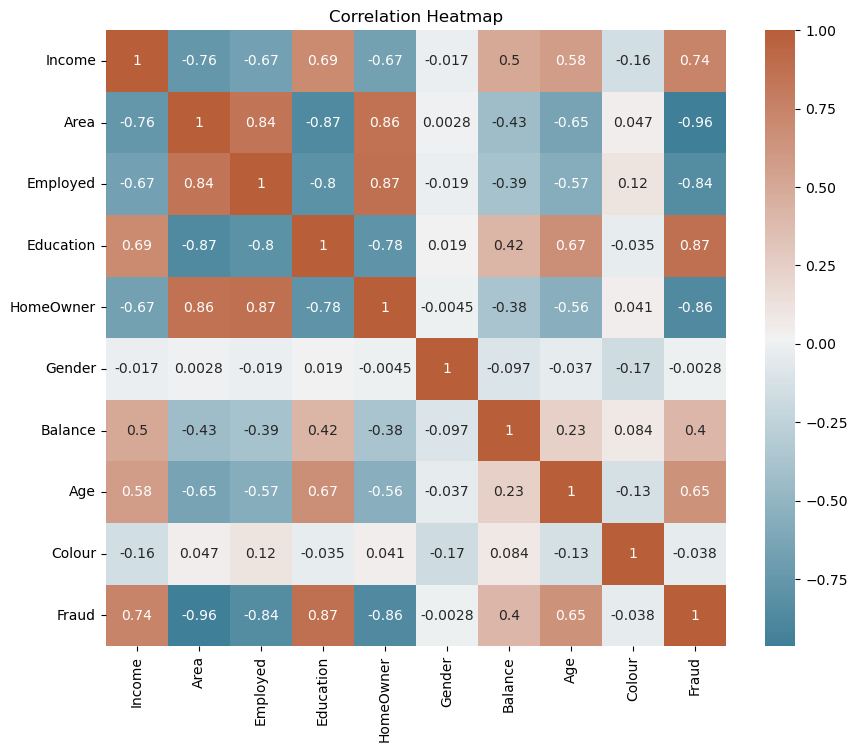

In [75]:
# Displaying Correlations on a heatmap so can be easily read and checked. The deeper the colour (closer to 1.00 / -0.1) the higher the correllation.
# Shows little correllation with columns gender and age. Balance and Age have medium correllations so should be fine. The rest have goo correllation.
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot=True, cmap=sns.diverging_palette(225, 25, as_cmap=True))
plt.title('Correlation Heatmap')
plt.show()

In [77]:
# Addressing Imbalance by Combineing College with University.

In [79]:
df['Education'] = df['Education'].replace([0, 1, 2], [0, 1, 1])

C:\Users\Luke\AppData\Local\Temp\ipykernel_13812\2354926893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education'] = df['Education'].replace([0, 1, 2], [0, 1, 1])


In [81]:
df = df[df['Gender'] != 3]

In [83]:
print(df['Gender'].unique())

[0 1]


In [85]:
print(df['Education'].unique())

[1 0]


# Encoding and Normalisation

In [88]:
import category_encoders as ce

In [90]:
# Ordinal encoder for Education as few known order for school, college, uni
# Could user label encoder instead.

# Ordinal Encoding for 'Education' as there is a order to School and University. Could have used label encoding.
education_mapping = {"School": 0, "University": 1}
encoder_education = ce.OrdinalEncoder(mapping=[{'col': 'Education', 'mapping': education_mapping}])
df = encoder_education.fit_transform(df)

# Binary encoder for colour as many categories with no order. Could have potentially have used one-hot.
encoder_colour = ce.BinaryEncoder(cols=['Colour'])
colour_encoded = encoder_colour.fit_transform(df['Colour'])

df = df.drop('Colour', axis=1)
df = pd.concat([df, colour_encoded], axis=1)

# One-Hot Encoding for 'Area', 'Employed', 'HomeOwner', 'Gender', 'Fraud' as no order
df = pd.get_dummies(df, columns=['Area', 'Employed', 'HomeOwner', 'Gender', 'Fraud'], drop_first=True)

C:\Users\Luke\.conda\envs\test\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
C:\Users\Luke\.conda\envs\test\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
C:\Users\Luke\.conda\envs\test\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is 

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, 1 to 119
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Income       106 non-null    float64
 1   Education    106 non-null    int64  
 2   Balance      106 non-null    int64  
 3   Age          106 non-null    int64  
 4   Colour_0     106 non-null    int64  
 5   Colour_1     106 non-null    int64  
 6   Colour_2     106 non-null    int64  
 7   Colour_3     106 non-null    int64  
 8   Area_1       106 non-null    bool   
 9   Employed_1   106 non-null    bool   
 10  HomeOwner_1  106 non-null    bool   
 11  Gender_1     106 non-null    bool   
 12  Fraud_1      106 non-null    bool   
dtypes: bool(5), float64(1), int64(7)
memory usage: 8.0 KB


In [94]:
print(df.dtypes)

Income         float64
Education        int64
Balance          int64
Age              int64
Colour_0         int64
Colour_1         int64
Colour_2         int64
Colour_3         int64
Area_1            bool
Employed_1        bool
HomeOwner_1       bool
Gender_1          bool
Fraud_1           bool
dtype: object


In [96]:
encoder_education

OrdinalEncoder(cols=[],
               mapping=[{'col': 'Education', 'data_type': dtype('O'),
                         'mapping': School        0
University    1
dtype: int64}])

In [98]:
print(df.columns) 

Index(['Income', 'Education', 'Balance', 'Age', 'Colour_0', 'Colour_1',
       'Colour_2', 'Colour_3', 'Area_1', 'Employed_1', 'HomeOwner_1',
       'Gender_1', 'Fraud_1'],
      dtype='object')


In [100]:
print(df['Education'].unique())

[1 0]


# Training and Scaling the data

In [126]:
# Dropping Columns with no correllation
y = df['Fraud_1'].values
X = df.drop(columns=['Fraud_1']).values

In [330]:
# Splitting dataset into training and testing sets with test size for training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [332]:
# Scaling after splitting
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Supervised Learning

# KNN

In [336]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets, preprocessing

In [338]:
print(X_train.shape)
print(y_train.shape)

(74, 12)
(74,)


In [408]:
# Training KNN clasiffier setting by 5.
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [410]:
# Displaying the accurracy score or train and test sets. Showing high accurracy.
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.97


In [412]:
# Also showing score of both.
knn.score(X_train, y_train)

0.9864864864864865

In [414]:
# Running KNN Prediction
y_pred = knn.predict(X_test)

In [416]:
# Print the confusion matrix to show how well the model is working showing correct and incorrect predictions
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  1]
 [ 0 18]]


In [352]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      0.93      0.96        14
        True       0.95      1.00      0.97        18

    accuracy                           0.97        32
   macro avg       0.97      0.96      0.97        32
weighted avg       0.97      0.97      0.97        32



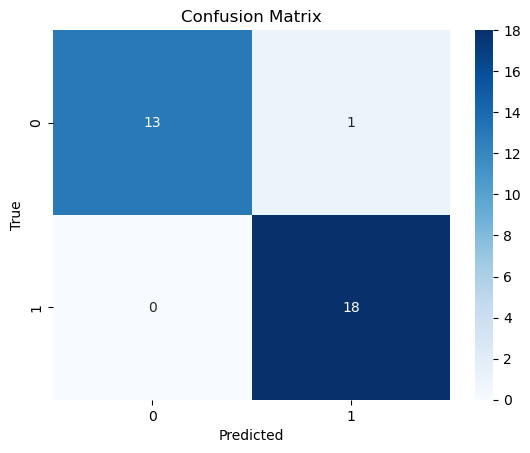

In [354]:
# Displaying Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# k-fold cross validation.

In [356]:
import pickle

In [358]:
#target = y.unique()
#target

In [360]:
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring = "accuracy")

In [362]:
# Print the accuracy for each value of CV
scores

array([1.        , 1.        , 1.        , 0.875     , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.85714286])

In [364]:
# Compute the mean accuracy
scores.mean()

0.9732142857142858

In [366]:
# Persist the model for use elsewhere
model = pickle.dumps(knn)# This persists the knn model

In [368]:
s_model = pickle.loads(model)

In [370]:
pred = s_model.predict(X_test)#predicts the class using the test data
pred[:10]

array([False, False,  True, False,  True,  True,  True, False,  True,
        True])

In [372]:
ks = range(1,31)
k_score = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train,y_train, cv = 10, scoring = "accuracy")
    k_score.append(scores.mean())
print(k_score)

[0.9607142857142857, 0.9607142857142857, 0.9732142857142858, 0.9732142857142858, 0.9732142857142858, 0.9732142857142858, 0.9732142857142858, 0.9732142857142858, 0.9732142857142858, 0.9732142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9732142857142858, 0.9732142857142858, 0.9732142857142858, 0.9732142857142858, 0.9732142857142858, 0.9732142857142858, 0.9732142857142858, 0.9732142857142858, 0.9732142857142858, 0.9732142857142858, 0.9732142857142858, 0.9732142857142858, 0.9732142857142858, 0.9732142857142858, 0.9732142857142858, 0.9732142857142858, 0.9732142857142858]


Text(0, 0.5, 'Cross Validation Accuracy')

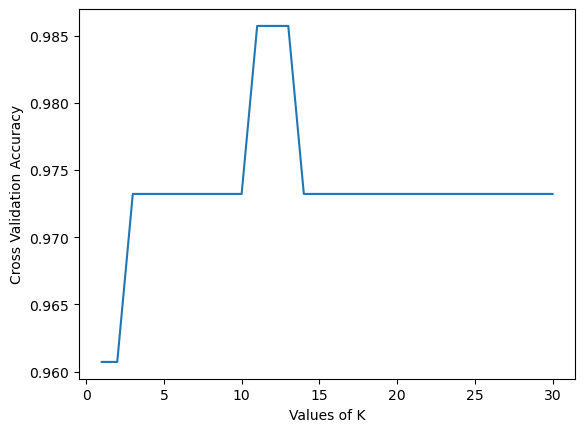

In [373]:
plt.plot(ks, k_score)
plt.xlabel("Values of K")
plt.ylabel("Cross Validation Accuracy")

In [376]:
# Using more efficient GridSearch Object
from sklearn.model_selection import GridSearchCV
ks = range(1,35)
params = dict(n_neighbors = ks)
grid = GridSearchCV(knn, params, cv = 10, scoring = "accuracy")
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=30),
             param_grid={'n_neighbors': range(1, 35)}, scoring='accuracy')

In [378]:
print(params)

{'n_neighbors': range(1, 35)}


In [380]:
# Best score
grid.best_score_

0.9857142857142858

In [382]:
# Best model
grid.best_estimator_

KNeighborsClassifier(n_neighbors=11)

In [384]:
def best(grid):
    print(grid.best_params_)
    print(grid.best_score_)
    print(grid.best_estimator_)
best(grid)

{'n_neighbors': 11}
0.9857142857142858
KNeighborsClassifier(n_neighbors=11)


# Decision Tree Classifier

In [419]:
from sklearn import tree

In [421]:
# Training Decision Tree clasiffier.
# Limit tree depth (max_depth) to prevent it from growing too deep.
# Increase min_samples_split and min_samples_leaf to avoid splitting too early or too specifically.
# Use cross-validation to check your model's ability to generalize.
clf = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=0)

In [423]:
# Displaying the score
print('Accuracy of Decision tree classifier on training set is', clf.score(X_train, y_train))
print('Accuracy of decision tree classifier on test set is', clf.score(X_test, y_test))

Accuracy of Decision tree classifier on training set is 0.9864864864864865
Accuracy of decision tree classifier on test set is 0.96875


In [425]:
# Running decision Tree Prediction
pred = clf.predict(X_test)
pred[:10]

array([False, False,  True, False,  True,  True,  True, False,  True,
        True])

In [427]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 0,
 'splitter': 'best'}

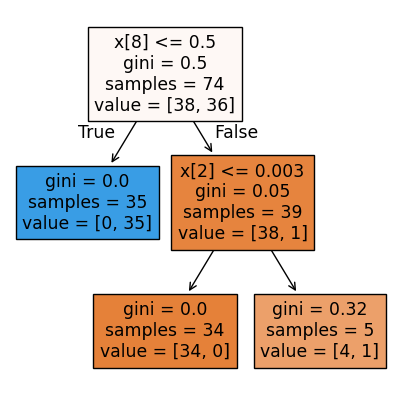

In [429]:
# Plotting the decision tree 
plt.figure(figsize=(5, 5))
plot_tree(clf, filled=True)
plt.show()

In [431]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy: {scores.mean()}")

Cross-Validation Accuracy: 0.96


# Random Forest Classifier

In [445]:
# Importing random forest classifer to use for my 3rd supervised learning model. 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier

In [447]:
# running classifier using 10 for estimators and fitting data based on training set. 
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=4, random_state=0)
rfc = rfc.fit(X_train, y_train)

In [449]:
# Showing accurracy score of the random forest classifier.
print('Accuracy of Random Forest classifier on training set is', rfc.score(X_train, y_train))
print('Accuracy of Random Forest classifier on test set is', rfc.score(X_test, y_test))

Accuracy of Random Forest classifier on training set is 0.9864864864864865
Accuracy of Random Forest classifier on test set is 0.96875


In [451]:
rfc.score(X_train, y_train)

0.9864864864864865

In [453]:
# Random Forest Predictions
predrfc = rfc.predict(X_test)
predrfc[:10]

array([False, False,  True, False,  True,  True,  True, False,  True,
        True])

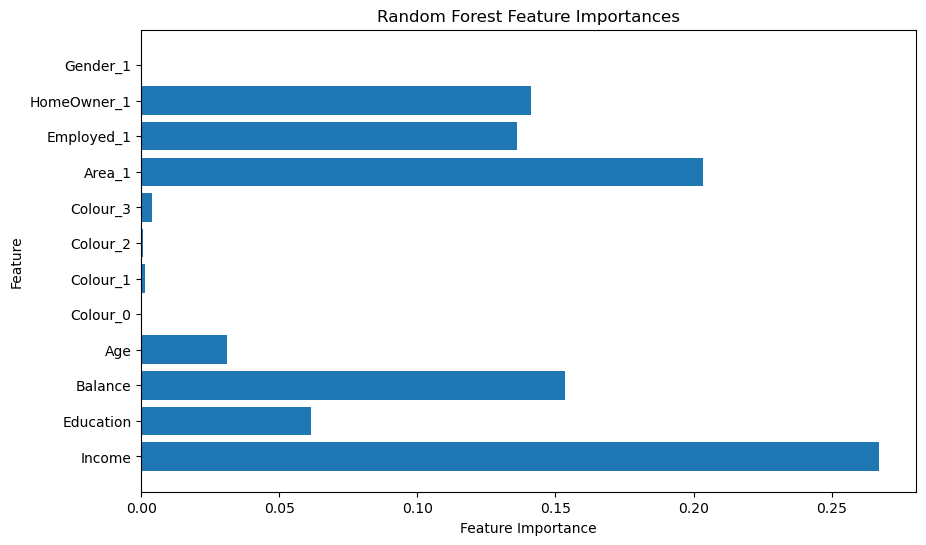

In [455]:
#A key advantage of using Random Forest is that it can tell you how important each feature is for making predictions. 
#You can visualize the feature importances using a bar plot:
X = pd.DataFrame(X, columns=df.columns[:-1])

# Plot feature importances
importances = rfc.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.show()

In [457]:
y = y == 2  # make binary

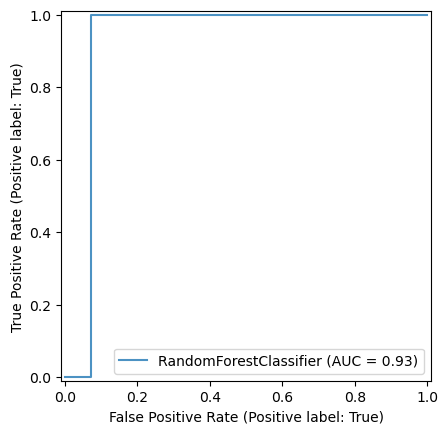

In [459]:
# ROC Curves
ax = plt.gca()  # Create a new axis for plotting
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)

In [461]:
svc = SVC(probability=True)  # probability=True is important for ROC curves
svc.fit(X_train, y_train)

SVC(probability=True)

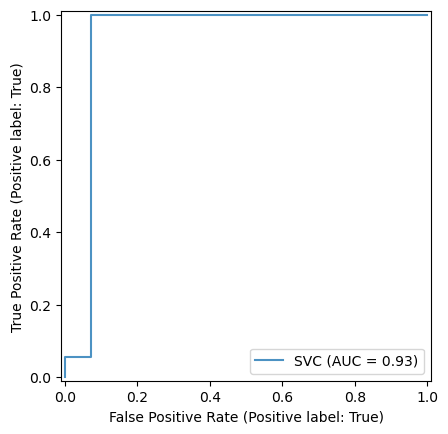

In [463]:
# SVM ROC Curve
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test, alpha=0.8)
plt.show()

In [465]:
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

       False       1.00      0.93      0.96        14
        True       0.95      1.00      0.97        18

    accuracy                           0.97        32
   macro avg       0.97      0.96      0.97        32
weighted avg       0.97      0.97      0.97        32



In [467]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rfc, X_train, y_train, cv=10)  # 10-fold cross-validation
print(f"Cross-validation mean score: {cv_scores.mean()}")

Cross-validation mean score: 0.9875


In [469]:
# For binary classification
svc = SVC(random_state=42, probability=True)
svc.fit(X_train, y_train)

SVC(probability=True, random_state=42)

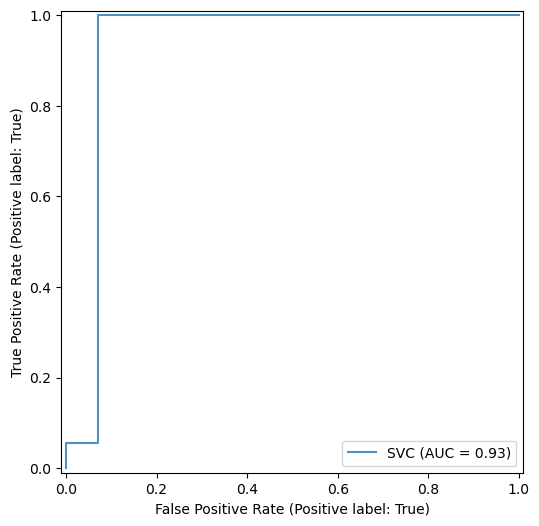

In [471]:
# Use predict_proba for ROC Curve (probability scores)
fig, ax = plt.subplots(figsize=(8, 6))
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test, response_method="predict_proba", ax=ax, alpha=0.8)
plt.show()

# Unsupervised Learning

# Clustering - KMeans
KMeans is an unsupervised learning algorithm that divides the data into clusters

In [ ]:
#pip install yellowbrick

In [475]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.features import ParallelCoordinates

In [477]:
# Define the number of clusters (k)
k=5

In [479]:
# Fit the model
pca = PCA(n_components=2)  # Reduce to 2 dimensions for better visualization
X_pca = pca.fit_transform(X)

In [481]:
kmeans = KMeans(n_clusters=k, random_state=42)
y = kmeans.fit_predict(X_pca)

In [483]:
y

array([4, 0, 1, 1, 0, 4, 4, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 4, 0, 0, 0, 1, 4, 0, 0, 0, 1, 4, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 4, 0, 3, 1, 0, 4, 0, 1, 0, 1, 0, 4, 1, 0, 0,
       1, 0, 4, 3, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 4, 0, 3, 0, 0, 1, 0,
       0, 4, 0, 4, 1, 0, 0, 1, 0, 4, 1, 1, 0, 1, 1, 0, 0, 4])

In [485]:
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Get the cluster labels for each point
labels = kmeans.labels_
print("Cluster Labels:")
print(labels)

Cluster Centers:
[[-27980.47599357   4979.52661182]
 [ 10106.21971864  -2315.46899632]
 [204850.42470447 132882.62280987]
 [ 97710.92708998 -66918.27849307]
 [ 43097.71666761  -7932.95103043]]
Cluster Labels:
[4 0 1 1 0 4 4 0 0 2 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 4 0 0 0 1 4 0 0 0 1 4
 0 0 0 4 0 0 0 0 0 1 1 1 1 0 4 0 3 1 0 4 0 1 0 1 0 4 1 0 0 1 0 4 3 0 0 0 1
 1 0 1 0 1 1 0 4 0 3 0 0 1 0 0 4 0 4 1 0 0 1 0 4 1 1 0 1 1 0 0 4]


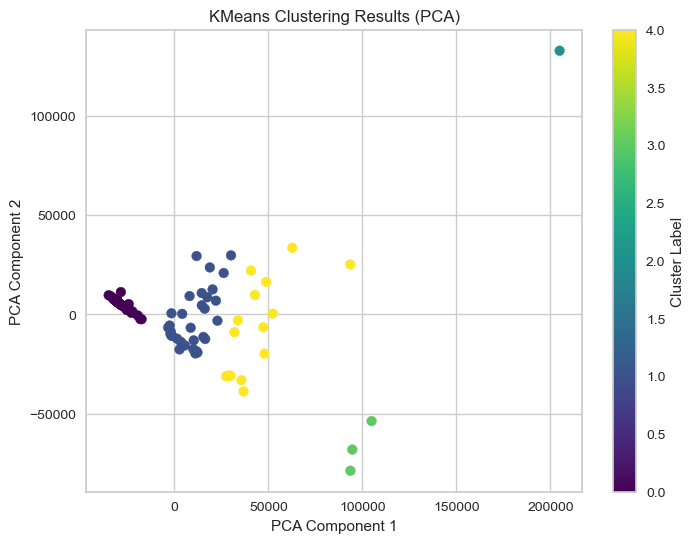

In [487]:
# PCA to reduce the dimensionality to 2D and plot the clusters:
# Reduce to 2D using PCA for visualization

# Create a scatter plot of the 2D data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1], c=y, cmap='viridis')
plt.title('KMeans Clustering Results (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [489]:
income_column = pd.DataFrame(X)[y == 0]['Income']
print(income_column)
# income_column = X.loc[y == 0, 'Income']

1      18500.0
4      15000.0
7       5435.0
8      12130.0
10      6325.0
12      4325.0
13     21250.0
14      4500.0
16      9860.0
17      4550.0
20     10000.0
21      9999.0
24      4654.0
27      5560.0
28     12345.0
29      5400.0
32      4200.0
33      7525.0
34      8359.0
37      5200.0
38      4500.0
39     12300.0
41      5500.0
42     20650.0
43     11250.0
44         0.0
45      5560.0
50     12345.0
52     12340.0
55     15000.0
57      5200.0
59     12300.0
61     12340.0
64      3124.0
65     12150.0
67     11250.0
70      4653.0
71      4500.0
72      1230.0
75      3225.0
77      3845.0
80      9540.0
82     12340.0
84      5000.0
85      4655.0
87     12250.0
88      8050.0
90     11111.0
93      4500.0
94     12300.0
96      3225.0
100     5600.0
103     7650.0
104     5450.0
Name: Income, dtype: object


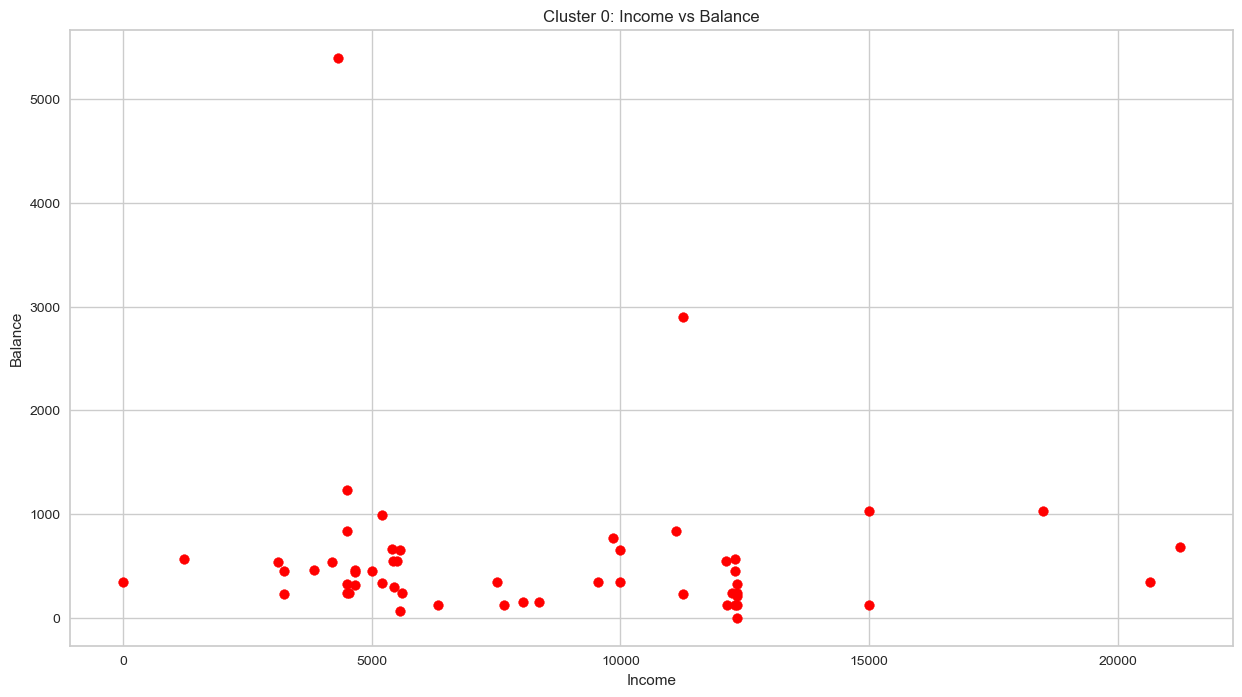

In [491]:
# Plotting specific columns (e.g., 'Income' and 'Balance') for cluster 0 from df
f, ax = plt.subplots(figsize=(15, 8))
# Access 'Income' and 'Balance' from the original DataFrame df, filtered by the cluster labels
ax.scatter(df.loc[y == 0, 'Income'], df.loc[y == 0, 'Balance'], c='red')
ax.set_xlabel('Income')
ax.set_ylabel('Balance')
plt.title('Cluster 0: Income vs Balance')
plt.show()

C:\Users\Luke\.conda\envs\test\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


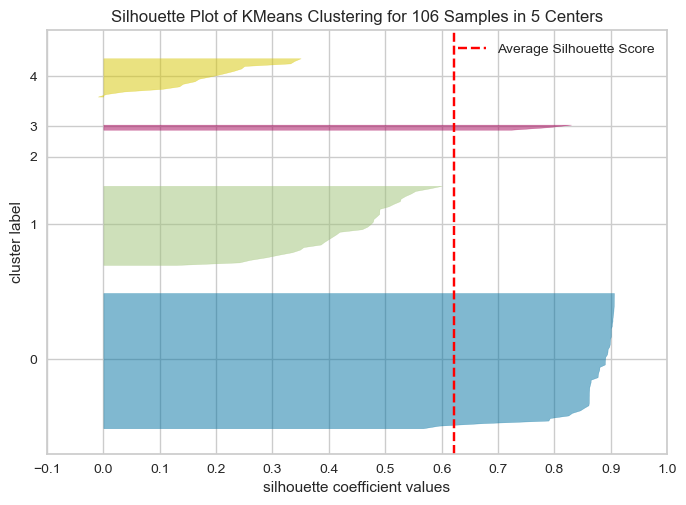

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 106 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [493]:
# Visualize the Silhouette Score to assess clustering quality
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X_pca)  # Fit the model to the PCA-transformed data
visualizer.show()

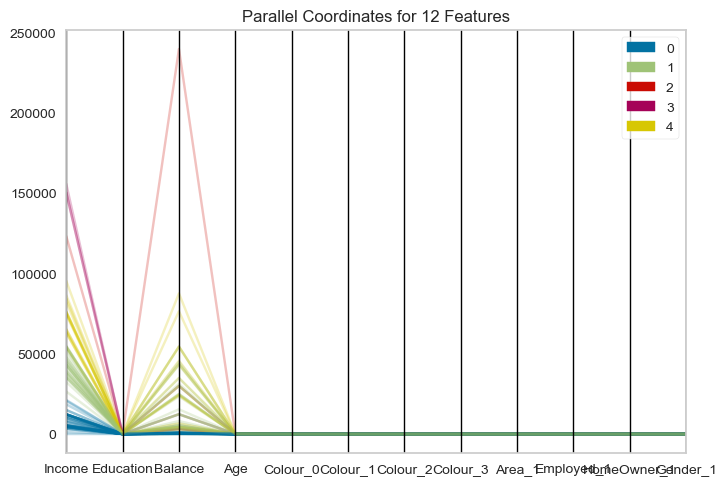

<Axes: title={'center': 'Parallel Coordinates for 12 Features'}>

In [495]:
# Parallel Coordinates to visualize cluster feature relationships
visualizer = ParallelCoordinates()
visualizer.fit(X, y)  # Fit the original X data and cluster labels
visualizer.show()

# Spectral Coclustering

Spectral Coclustering is a technique used for partitioning both rows and columns of a matrix simultaneously. It’s commonly applied in problems like bi-clustering where you want to find groups of similar rows and columns, such as in gene expression data or recommendation systems.

In [498]:
from sklearn.cluster import SpectralCoclustering

In [502]:
#X

In [504]:
# Number of clusters
n_clusters = 3

# Fit the model
model = SpectralCoclustering(n_clusters=n_clusters, random_state=42)
model.fit(X)

SpectralCoclustering(random_state=42)

In [506]:
# Get the labels
row_labels = model.row_labels_
col_labels = model.column_labels_

In [508]:
X_array = X.values if hasattr(X, 'values') else X  # Safe handling if X is DataFrame
X_reordered = X_array[np.argsort(row_labels), :]    # Reorder rows
X_reordered = X_reordered[:, np.argsort(col_labels)]  # Then reorder columns

In [510]:
X_reordered = pd.DataFrame(X_reordered)

In [512]:
X_reordered = X_reordered.apply(pd.to_numeric, errors='coerce')

In [514]:
print(X_reordered.dtypes)

0        bool
1        bool
2        bool
3     float64
4       int64
5       int64
6       int64
7       int64
8       int64
9       int64
10       bool
11      int64
dtype: object


In [516]:
print(type(X_reordered))

<class 'pandas.core.frame.DataFrame'>


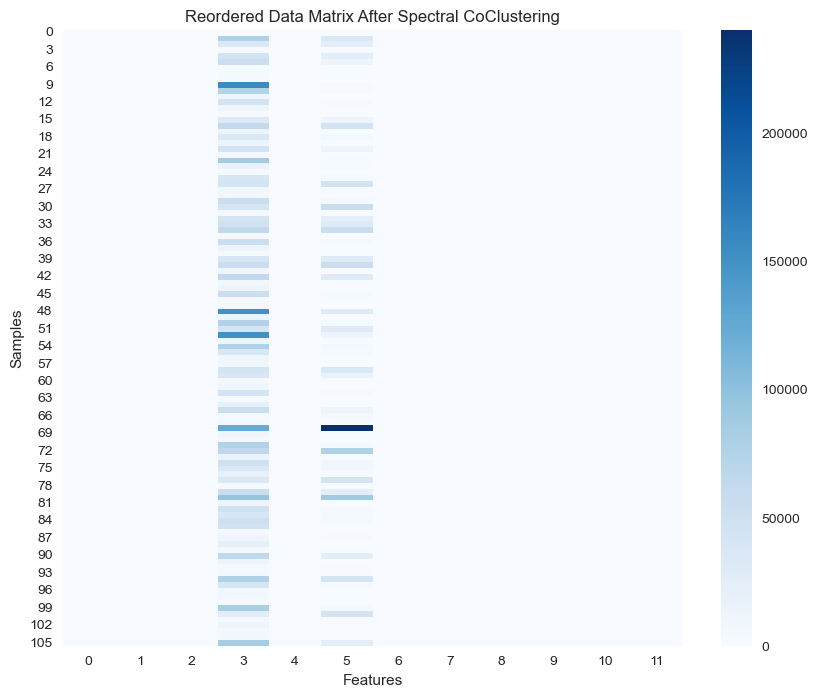

In [518]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_reordered.astype(float), cmap="Blues", cbar=True)
plt.title('Reordered Data Matrix After Spectral CoClustering')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()

In [520]:
# Print the row and column cluster labels
print("Row Cluster Labels:", row_labels)
print("Column Cluster Labels:", col_labels)

# Reorder the rows and columns according to the cluster labels
X_array = X.values if hasattr(X, 'values') else X  # Safe handling if X is DataFrame
X_reordered = X_array[np.argsort(row_labels), :]
X_reordered = X_reordered[:, np.argsort(col_labels)]

Row Cluster Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Column Cluster Labels: [1 1 1 1 2 1 1 1 0 0 0 1]


# Deep Learning Model

In [ ]:
#pip install np_utils

In [522]:
import tensorflow as tf
from tensorflow import keras
import scikeras
from keras import layers, datasets, models, Sequential, utils
#from tensorflow.keras import layers
from keras.layers import Dense, InputLayer, Dropout, Flatten, Conv2D, MaxPooling2D
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [523]:
print(scikeras.__version__)

0.13.0


In [532]:
def createDeepModel():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(12,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [534]:
model = createDeepModel()

In [536]:
# Train the model
with tf.device("/GPU:0"):
    history = model.fit(X_train, y_train, 
                        epochs=50, 
                        batch_size=32, 
                        validation_data=(X_test, y_test))

Epoch 1/50
3/3 [==============================] - 1s 145ms/step - loss: 0.6581 - accuracy: 0.7838 - val_loss: 0.6457 - val_accuracy: 0.7812
Epoch 2/50
3/3 [==============================] - 0s 7ms/step - loss: 0.6275 - accuracy: 0.8784 - val_loss: 0.6222 - val_accuracy: 0.8438
Epoch 3/50
3/3 [==============================] - 0s 7ms/step - loss: 0.5982 - accuracy: 0.9189 - val_loss: 0.5990 - val_accuracy: 0.8438
Epoch 4/50
3/3 [==============================] - 0s 7ms/step - loss: 0.5705 - accuracy: 0.9595 - val_loss: 0.5745 - val_accuracy: 0.8438
Epoch 5/50
3/3 [==============================] - 0s 7ms/step - loss: 0.5419 - accuracy: 1.0000 - val_loss: 0.5492 - val_accuracy: 0.9688
Epoch 6/50
3/3 [==============================] - 0s 7ms/step - loss: 0.5136 - accuracy: 1.0000 - val_loss: 0.5230 - val_accuracy: 0.9688
Epoch 7/50
3/3 [==============================] - 0s 7ms/step - loss: 0.4851 - accuracy: 1.0000 - val_loss: 0.4965 - val_accuracy: 0.9688
Epoch 8/50
3/3 [================

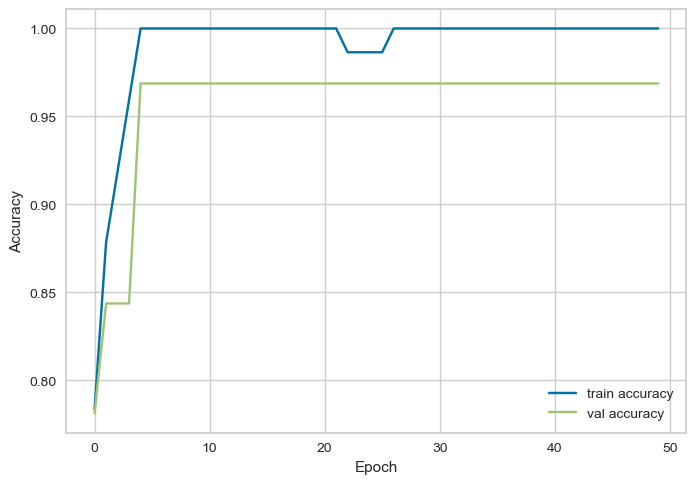

In [539]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [541]:
test_loss, test_acc  = model.evaluate(X_test, y_test, verbose = 1)

1/1 [==============================] - 0s 12ms/step - loss: 0.1907 - accuracy: 0.9688


In [543]:
print(f"Test accuracy : {test_acc:.3f}")
print(f"Test loss : {test_loss:.3f}")

Test accuracy : 0.969
Test loss : 0.191
